# Most Important Features

### Imports and Data

In [16]:
import pandas as pd
from pandas import DataFrame
from pandas import read_csv as read
import seaborn as sns
import matplotlib.pyplot as plt

df_fi_g = read('../outputs/general/feature_importance_general.csv')
df_fi_i = read('../outputs/individual/feature_importance_individual.csv')

### Feature Importance Tables

Below, a function is defined that creates a new dataframe containing the min, max, 25th and 75th quartiles, mean and median of all of the features for the provided dataframe.

In [4]:
# We only look at tree-based models
ref_models = ['RandomForestRegressor', 'DecisionTreeRegressor', 'ExtraTreesRegressor', 'GradientBoostingRegressor']

def summarize_features(df:DataFrame):
    df['Model'] = df['Model'].str.split('(').str[0]  # Simplify model names so that they can be filtered by name
    df_fi_g_filtered = df[df['Model'].isin(ref_models)]  # Filter models to only be top 4 tree based

    # Create a new table where the quartiles and mean of each feature is determined, grouped by model
    feature_stats = df_fi_g_filtered.groupby(['Feature', 'Model']).agg(
        Min=pd.NamedAgg(column='Value', aggfunc='min'),
        Q25=pd.NamedAgg(column='Value', aggfunc=lambda x: x.quantile(0.25)),
        Median=pd.NamedAgg(column='Value', aggfunc='median'),
        Q75=pd.NamedAgg(column='Value', aggfunc=lambda x: x.quantile(0.75)),
        Max=pd.NamedAgg(column='Value', aggfunc='max'),
        Mean=pd.NamedAgg(column='Value', aggfunc='mean')
    ).reset_index()
    # Rename column names
    feature_stats.rename(columns={'Q25': '25q', 'Q75': '75q'}, inplace=True)

    return feature_stats

In [5]:
def get_most_important_features(feature_stats:DataFrame, sort_by:str, num_features:int):
    top_features_mean = feature_stats.groupby('Model').apply(lambda x: x.nlargest(num_features, sort_by))
    return top_features_mean.drop('Model', axis=1).reset_index().drop('level_1', axis=1)

#### General
The top three features for general models are obtained from the data.

In [8]:
feature_stats_g = summarize_features(df_fi_g)

In [10]:
# Top 3 features of each model by mean
top_features_mean = get_most_important_features(feature_stats_g, 'Mean', 3)
top_features_mean.to_csv('../outputs/summary/top_features_mean_general.csv', mode='w', header=True, index=False)

In [11]:
top_features_median = get_most_important_features(feature_stats_g, 'Median', 3)
top_features_median.to_csv('../outputs/summary/top_features_median_general.csv', mode='w', header=True, index=False)

#### Individual
The top three features for individual models are obtained from the data.

In [12]:
feature_stats_i = summarize_features(df_fi_i)

In [13]:
# Top 3 features of each model by mean
top_features_mean = get_most_important_features(feature_stats_i, 'Mean', 3)
top_features_mean.to_csv('../outputs/summary/top_features_mean_individual.csv', mode='w', header=True, index=False)

In [14]:
# Top 3 features of each model by median
top_features_median = get_most_important_features(feature_stats_i, 'Median', 3)
top_features_median.to_csv('../outputs/summary/top_features_median_individual.csv', mode='w', header=True, index=False)

### Plotting Feature Importance for All Models

In [17]:
def create_fi_plot(df:DataFrame):
    # Filter out top tree-based models and make a copy of the dataframe
    feature_df = df[df['Model'].str.split('(').str[0].isin(ref_models)].copy()
    # Remove everything after '(' in the Model column
    feature_df['Model'] = feature_df['Model'].str.split('(').str[0]

    # Only include features that appear more than n times
    n = 0
    feature_counts = feature_df['Feature'].value_counts()
    mask = feature_df['Feature'].isin(feature_counts.index[feature_counts > n])
    filtered_feature_df = feature_df[mask]

    # Create the scatterplot
    g = sns.scatterplot(x='Value', y='Feature', data=filtered_feature_df, hue="Model")
    g.figure.set_size_inches(12, 18)

##### General Models

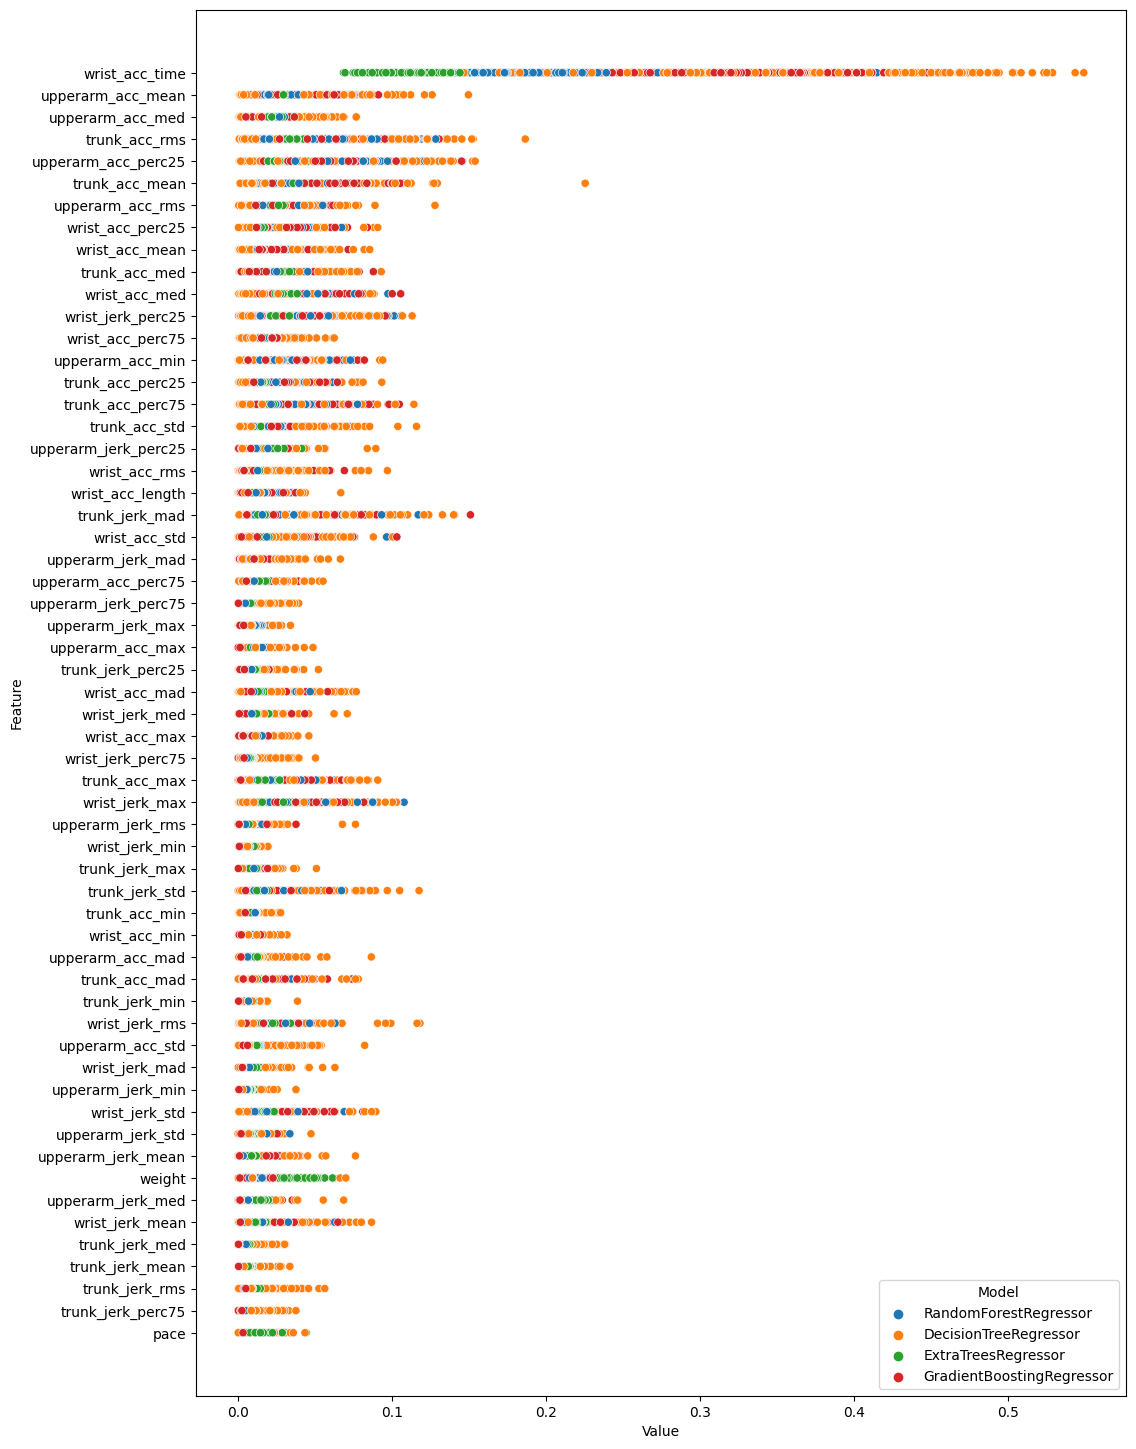

In [18]:
create_fi_plot(df_fi_g)

##### Individual Model

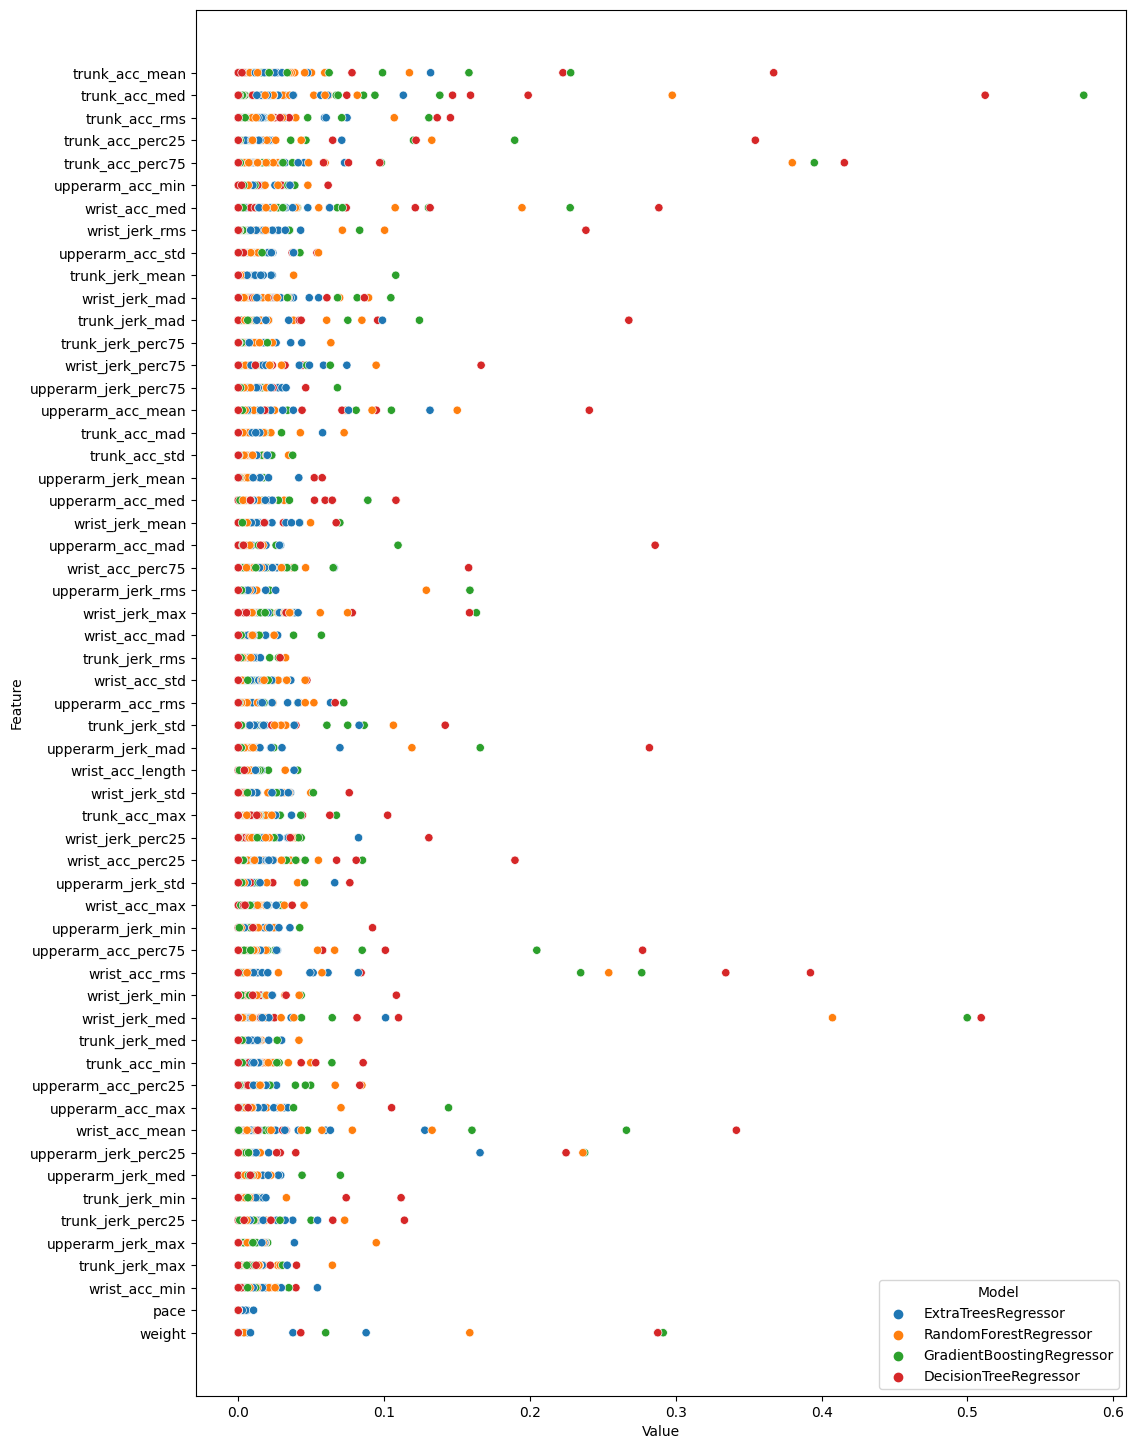

In [19]:
create_fi_plot(df_fi_i)